Importing Lib

In [4]:
pip install kagglehub tensorflow matplotlib seaborn pillow numpy


Note: you may need to restart the kernel to use updated packages.


 Extract the ZIP File

In [5]:
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Step 1: Define local ZIP file path
zip_file_path = r"D:\Garbage Classification\archive (10).zip"

# Step 2: Extract ZIP file
extract_path = r"D:\Garbage Classification\extracted_data"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)


Extracted to: D:\Garbage Classification\extracted_data


Inspect the Extracted Folder

In [6]:
for root, dirs, files in os.walk(extract_path):
    print("Root:", root)
    print("Dirs:", dirs)
    print("Files:", files)
    print("-" * 50)


Root: D:\Garbage Classification\extracted_data
Dirs: ['TrashType_Image_Dataset']
Files: []
--------------------------------------------------
Root: D:\Garbage Classification\extracted_data\TrashType_Image_Dataset
Dirs: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Files: []
--------------------------------------------------
Root: D:\Garbage Classification\extracted_data\TrashType_Image_Dataset\cardboard
Dirs: []
Files: ['cardboard_001.jpg', 'cardboard_002.jpg', 'cardboard_003.jpg', 'cardboard_004.jpg', 'cardboard_005.jpg', 'cardboard_006.jpg', 'cardboard_007.jpg', 'cardboard_008.jpg', 'cardboard_009.jpg', 'cardboard_010.jpg', 'cardboard_011.jpg', 'cardboard_012.jpg', 'cardboard_013.jpg', 'cardboard_014.jpg', 'cardboard_015.jpg', 'cardboard_016.jpg', 'cardboard_017.jpg', 'cardboard_018.jpg', 'cardboard_019.jpg', 'cardboard_020.jpg', 'cardboard_021.jpg', 'cardboard_022.jpg', 'cardboard_023.jpg', 'cardboard_024.jpg', 'cardboard_025.jpg', 'cardboard_026.jpg', 'cardboard_027.

Count Samples per Class + Bar Plot

Class Counts: {'cardboard': 403, 'glass': 501, 'metal': 410, 'paper': 594, 'plastic': 482, 'trash': 137}


C:\Users\HP\AppData\Local\Temp\ipykernel_100348\2711053854.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")


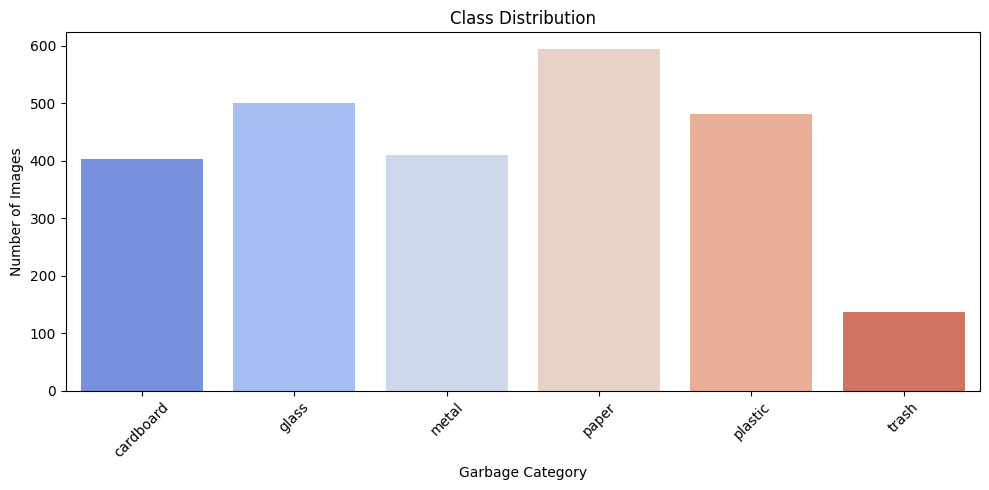

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

train_dir = r"D:\Garbage Classification\extracted_data\TrashType_Image_Dataset"

# Get all class names
classes = [cls for cls in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, cls))]

# Count samples in each class
class_counts = {
    cls: len(os.listdir(os.path.join(train_dir, cls)))
    for cls in classes
}

print("Class Counts:", class_counts)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="coolwarm")
plt.title("Class Distribution")
plt.xlabel("Garbage Category")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Show Sample Images from Each Class

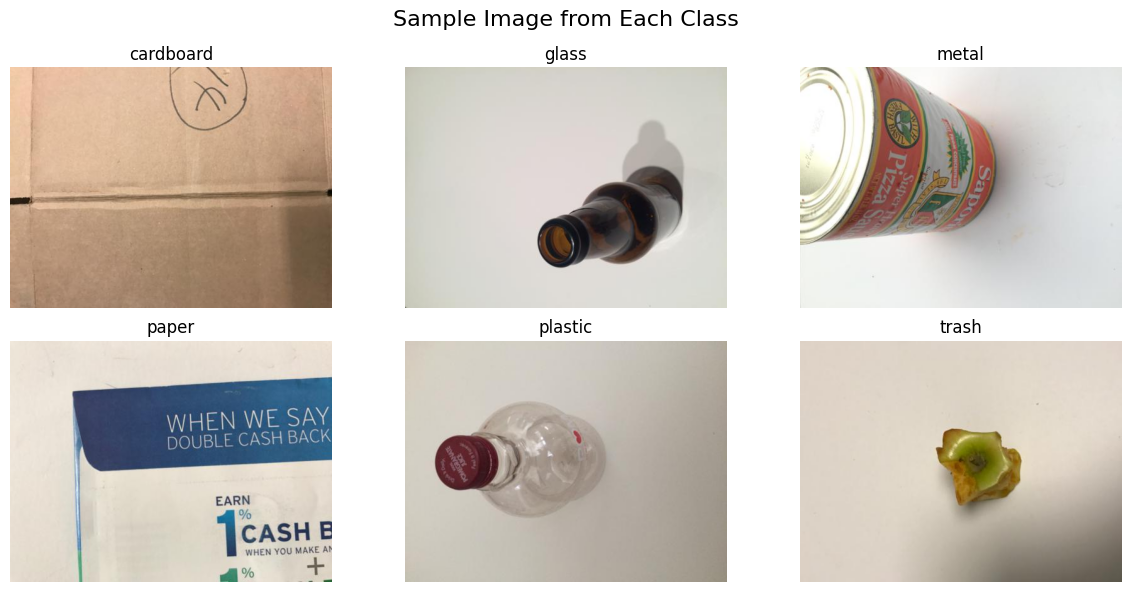

In [8]:
from PIL import Image

plt.figure(figsize=(12, 6))
for i, cls in enumerate(classes[:6]):  # limit to 6 classes for layout
    class_path = os.path.join(train_dir, cls)
    image_name = os.listdir(class_path)[0]  # pick first image
    image_path = os.path.join(class_path, image_name)
    img = Image.open(image_path)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.suptitle("Sample Image from Each Class", fontsize=16)
plt.tight_layout()
plt.show()


Exploratory Data Analysis (EDA)

Image Shape & Resolution Analysis

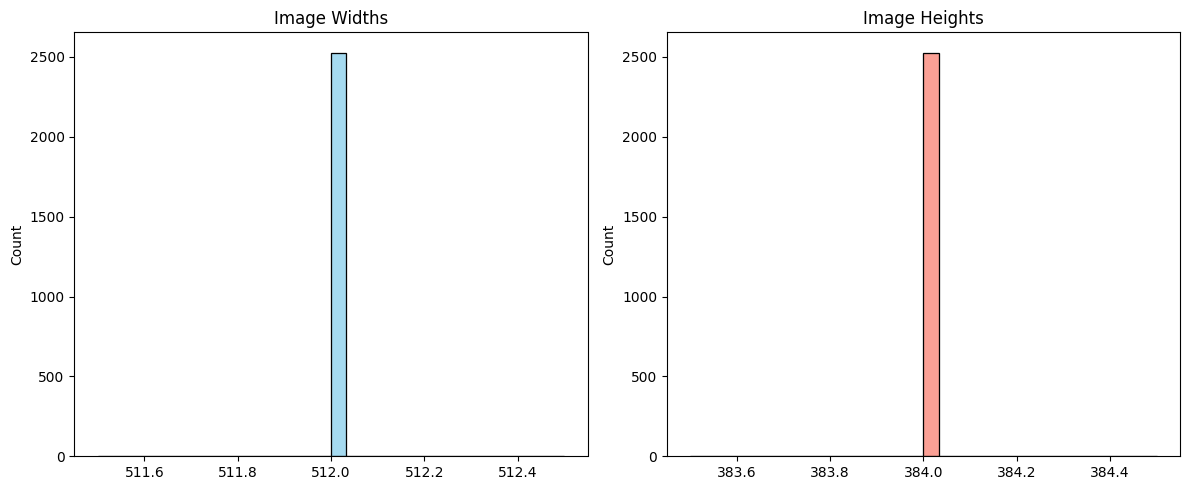

Avg Resolution: 512x384
Min: 512x384, Max: 512x384


In [9]:
from PIL import Image
import numpy as np

widths = []
heights = []

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            widths.append(img.width)
            heights.append(img.height)
        except:
            continue  # skip corrupted images

# Plot resolution distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, color="skyblue")
plt.title("Image Widths")

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, color="salmon")
plt.title("Image Heights")

plt.tight_layout()
plt.show()

print(f"Avg Resolution: {int(np.mean(widths))}x{int(np.mean(heights))}")
print(f"Min: {min(widths)}x{min(heights)}, Max: {max(widths)}x{max(heights)}")


Color Mode Check (RGB vs Grayscale)

In [10]:
from collections import Counter

modes = []

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path)[:10]:  # check first 10 per class
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            modes.append(img.mode)
        except:
            continue

mode_counts = Counter(modes)
print("Image Color Modes:", mode_counts)


Image Color Modes: Counter({'RGB': 60})


Show RGB Histogram for One Sample

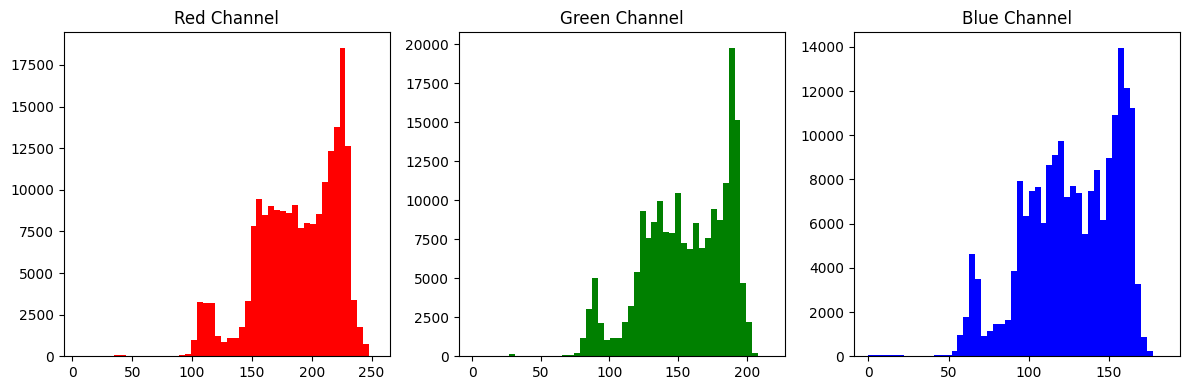

In [11]:
sample_img_path = os.path.join(train_dir, classes[0], os.listdir(os.path.join(train_dir, classes[0]))[0])
img = Image.open(sample_img_path)

r, g, b = img.split()

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(np.array(r).flatten(), bins=50, color='red')
plt.title('Red Channel')

plt.subplot(1, 3, 2)
plt.hist(np.array(g).flatten(), bins=50, color='green')
plt.title('Green Channel')

plt.subplot(1, 3, 3)
plt.hist(np.array(b).flatten(), bins=50, color='blue')
plt.title('Blue Channel')

plt.tight_layout()
plt.show()


Data Preprocessing

Preprocessing using Keras (ImageDataGenerator)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image settings
img_size = (224, 224)
batch_size = 32

# Data Augmentation (only for training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% will be used for val + test
)

# Validation/Test: only rescale
val_test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)

# Training data (70%)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

# Validation + Test (30%) → We'll split this later into 15%/15%
val_test_generator = val_test_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)


Found 1771 images belonging to 6 classes.
Found 756 images belonging to 6 classes.


Split Validation & Test Manually

In [13]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import numpy as np

# Get all val/test data
val_test_images, val_test_labels = [], []

for i in range(len(val_test_generator)):
    x, y = val_test_generator[i]
    val_test_images.extend(x)
    val_test_labels.extend(y)

# Convert to numpy arrays
val_test_images = np.array(val_test_images)
val_test_labels = np.array(val_test_labels)

# Split into validation and test
from sklearn.model_selection import train_test_split
X_val, X_test, y_val, y_test = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42, stratify=val_test_labels.argmax(axis=1)
)

print("Final Split:")
print("Train:", len(train_generator.filenames))
print("Validation:", len(X_val))
print("Test:", len(X_test))


Final Split:
Train: 1771
Validation: 378
Test: 378


Define Baseline CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Number of classes
num_classes = len(classes)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


d:\Garbage Classification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,166 (91.20 MB)

 Trainable params: 23,908,166 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [17]:
history = model.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32
)


d:\Garbage Classification\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 687ms/step - accuracy: 0.1934 - loss: 2.0277 - val_accuracy: 0.2354 - val_loss: 1.6955
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 626ms/step - accuracy: 0.2365 - loss: 1.7312 - val_accuracy: 0.3175 - val_loss: 1.6288
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 564ms/step - accuracy: 0.2588 - loss: 1.6777 - val_accuracy: 0.3836 - val_loss: 1.5216
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 726ms/step - accuracy: 0.3054 - loss: 1.6298 - val_accuracy: 0.3704 - val_loss: 1.4623
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 528ms/step - accuracy: 0.2779 - loss: 1.6289 - val_accuracy: 0.3995 - val_loss: 1.4533
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 611ms/step - accuracy: 0.3200 - loss: 1.5706 - val_accuracy: 0.3836 - val_loss: 1.4097
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 527ms/step - accuracy: 0.3144 - loss: 1.5586 - val_accuracy: 0.4048 - val_loss: 1.4098
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 38s 665ms/step - accuracy: 0.3317 - loss: 1.5255 - val_accu

Plot Accuracy and Loss Curves

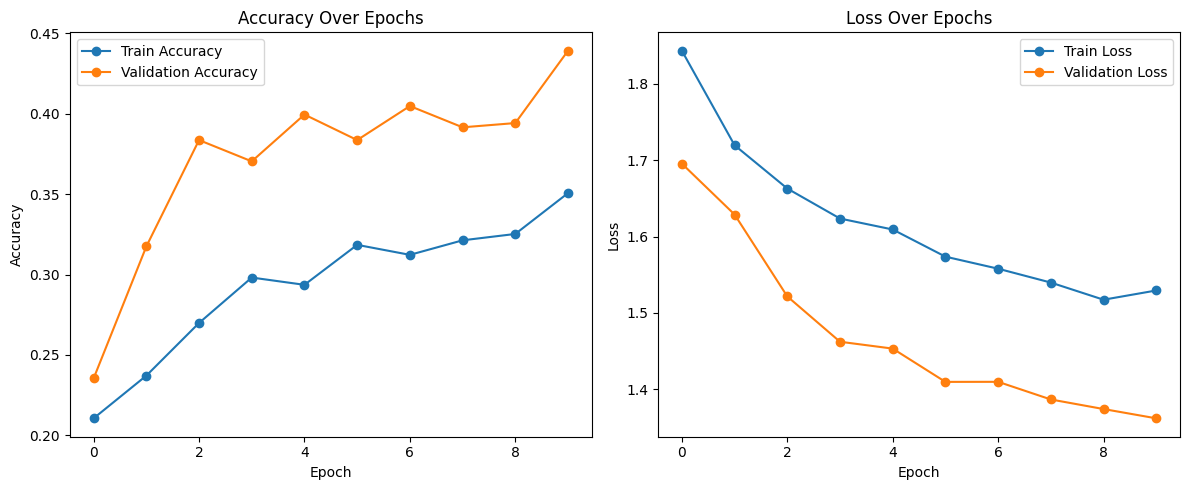

In [18]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Evaluate Accuracy on Test Set

In [19]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.4788 - loss: 1.3360
Test Accuracy: 45.24%


Classification Report

In [20]:
from sklearn.metrics import classification_report
import numpy as np

# Get true and predicted labels
y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.74      0.85      0.79        60
       glass       0.38      0.40      0.39        75
       metal       0.83      0.08      0.15        62
       paper       0.34      0.79      0.47        89
     plastic       0.83      0.21      0.33        72
       trash       0.00      0.00      0.00        20

    accuracy                           0.45       378
   macro avg       0.52      0.39      0.36       378
weighted avg       0.57      0.45      0.40       378



d:\Garbage Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Garbage Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Garbage Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


 Confusion Matrix

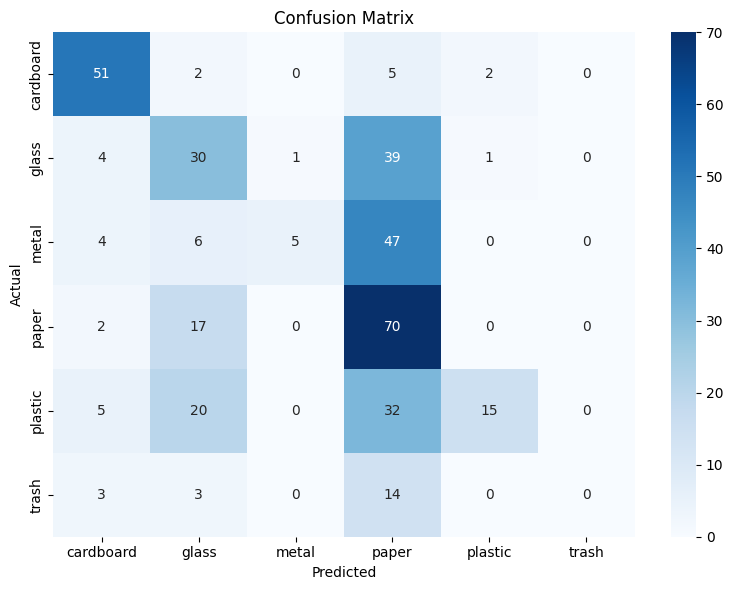

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


Load MobileNetV2 + Add Custom Layers

In [23]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load base model (exclude top/classification layers)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers initially

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model_tl = Model(inputs=base_model.input, outputs=output)

# Compile
model_tl.compile(optimizer=Adam(learning_rate=0.0001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

model_tl.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 18s 2us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Retrain with Transfer Learning

In [24]:
history_tl = model_tl.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=5,
    verbose=1
)


Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 473ms/step - accuracy: 0.2293 - loss: 2.0491 - val_accuracy: 0.5212 - val_loss: 1.3069
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 459ms/step - accuracy: 0.4294 - loss: 1.4617 - val_accuracy: 0.6164 - val_loss: 1.0772
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 453ms/step - accuracy: 0.5590 - loss: 1.1883 - val_accuracy: 0.6534 - val_loss: 0.9520
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 453ms/step - accuracy: 0.5909 - loss: 1.0462 - val_accuracy: 0.6746 - val_loss: 0.8792
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 447ms/step - accuracy: 0.6211 - loss: 0.9535 - val_accuracy: 0.6878 - val_loss: 0.8319


Unfreeze and Fine-Tune 

In [25]:
# Unfreeze the base model for fine-tuning
base_model.trainable = True

# Compile again (with lower learning rate)
model_tl.compile(optimizer=Adam(learning_rate=1e-5),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Fine-tune
fine_tune_history = model_tl.fit(
    train_generator,
    validation_data=(X_val, y_val),
    epochs=5,
    verbose=1
)


Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.3842 - loss: 1.5900 - val_accuracy: 0.7011 - val_loss: 0.8004
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.4938 - loss: 1.3118 - val_accuracy: 0.6984 - val_loss: 0.7908
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5993 - loss: 1.1085 - val_accuracy: 0.7037 - val_loss: 0.7820
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6359 - loss: 0.9909 - val_accuracy: 0.7037 - val_loss: 0.7754
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6418 - loss: 0.9471 - val_accuracy: 0.6931 - val_loss: 0.7668


Evaluate Improved Model on Test Set

In [27]:
# Evaluate on test set
test_loss_tl, test_acc_tl = model_tl.evaluate(X_test, y_test)
print(f"Transfer Learning Test Accuracy: {test_acc_tl * 100:.2f}%")


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step - accuracy: 0.7431 - loss: 0.7746
Transfer Learning Test Accuracy: 75.13%


In [31]:
from sklearn.metrics import classification_report
import numpy as np

# Get true and predicted labels
y_true = np.argmax(y_test, axis=1)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Classification Report:
              precision    recall  f1-score   support

   cardboard       0.74      0.85      0.79        60
       glass       0.38      0.40      0.39        75
       metal       0.83      0.08      0.15        62
       paper       0.34      0.79      0.47        89
     plastic       0.83      0.21      0.33        72
       trash       0.00      0.00      0.00        20

    accuracy                           0.45       378
   macro avg       0.52      0.39      0.36       378
weighted avg       0.57      0.45      0.40       378



d:\Garbage Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Garbage Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Garbage Classification\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Save the Trained Model

In [28]:
# Save the full model (Keras .h5 format)
model_tl.save("garbage_classifier_model.h5")

print(" Model saved as 'garbage_classifier_model.h5'")


 Model saved as 'garbage_classifier_model.h5'


Predict on a Single Image

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to a test image
img_path = r"D:\Garbage Classification\extracted_data\TrashType_Image_Dataset\metal\metal_389.jpg"  # Change as needed

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Same as training rescale

# Predict
prediction = model_tl.predict(img_array)
predicted_class = classes[np.argmax(prediction)]

print("🧾 Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
🧾 Predicted Class: metal


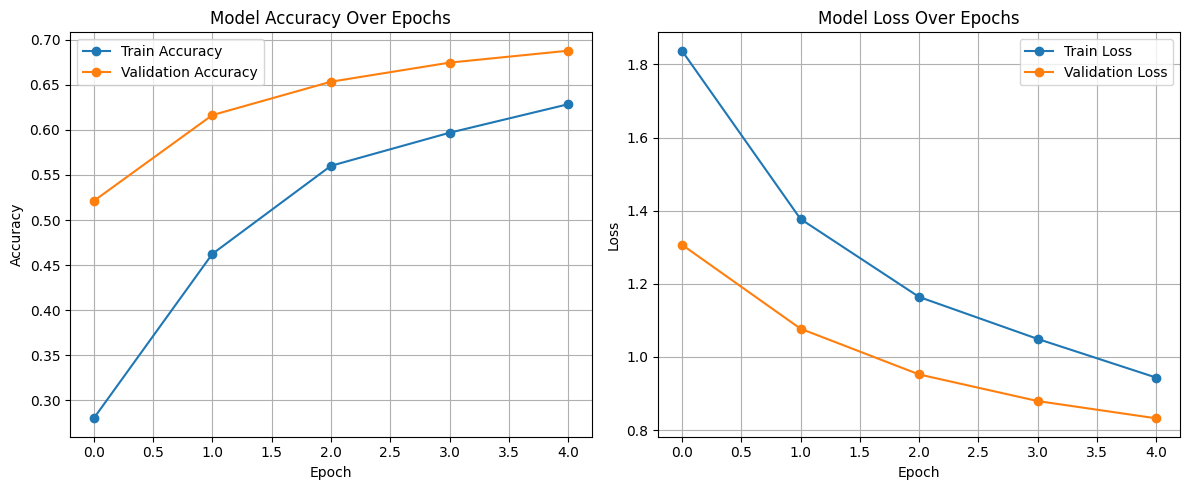

12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step


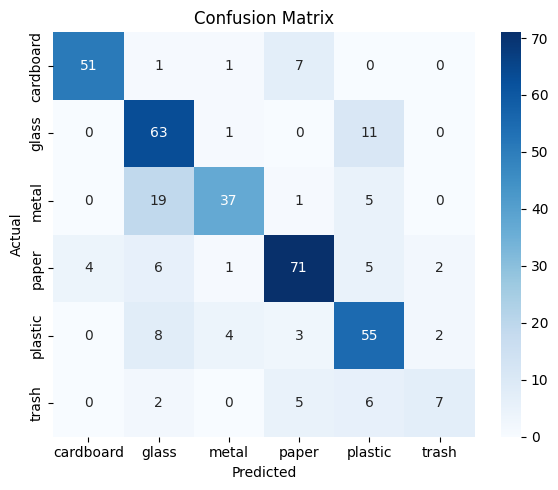

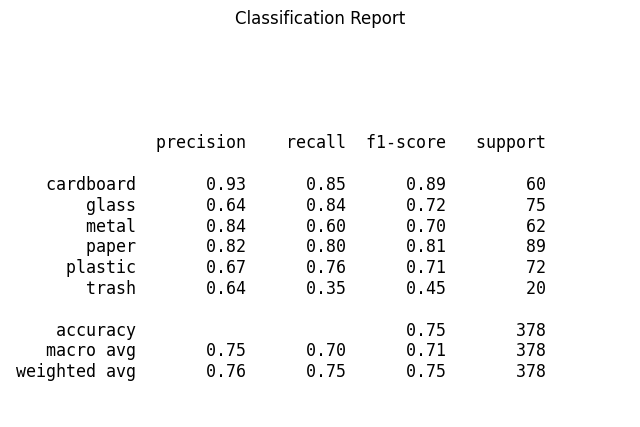

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# === 1. Plot Accuracy and Loss ===
def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig("model_accuracy_loss.png")
    plt.show()


# === 2. Confusion Matrix ===
def plot_confusion_matrix(model, X_test, y_test, classes):
    y_true = np.argmax(y_test, axis=1)
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    plt.show()

    return y_true, y_pred  # return for classification report


# === 3. Classification Report ===
def plot_classification_report(y_true, y_pred, classes):
    report_text = classification_report(y_true, y_pred, target_names=classes)
    
    # Render as image
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.axis('off')
    ax.text(0.01, 0.05, report_text, fontfamily='monospace', fontsize=12)
    plt.title("Classification Report")
    plt.savefig("classification_report.png")
    plt.show()


# === CALLING ALL ===

# Assuming `model_tl` is your trained model
# and `history_tl` is the training history object
# and `X_test`, `y_test` are test sets
# and `classes` is a list of class names like ['Plastic', 'Paper', ...]

plot_accuracy_loss(history_tl)

y_true, y_pred = plot_confusion_matrix(model_tl, X_test, y_test, classes)

plot_classification_report(y_true, y_pred, classes)
